# Decision Trees

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
RANDOM_STATE = 9

# Read in data
df = pd.read_csv('data/streamflow_prediction_dataset_averaged_cols.csv')
df = df.set_index('date')

# Create binary snow variable
df['Snow'] = np.where((df['WTEQ_BisonLake'] > 0) | (df['WTEQ_McClurePass'] > 0), 
                      1, 0)
series_pred = df['Snow']
df = df.drop(columns=['WTEQ_BisonLake', 'WTEQ_McClurePass', 'Snow'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, series_pred, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM_STATE)

# display
print('Data shape:', df.shape,'\n')
print('Dataframe:')
display(df)
print('Training Data:')
display(X_train)
display(y_train)
print('Testing Data:')
display(X_test)
display(y_test)

Data shape: (2996, 6) 

Dataframe:


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft
date,,,,,,
2008-03-12,26.00,24.80,17.375,10.2,17.74,20.62
2008-03-15,26.55,17.55,17.375,10.3,17.88,20.70
2008-03-17,26.70,19.35,17.425,10.3,18.04,20.64
2008-03-18,26.70,17.85,17.475,10.6,18.06,20.66
2008-03-19,26.70,25.50,17.425,10.6,18.06,20.64
...,...,...,...,...,...,...
2021-07-23,24.20,57.50,21.250,13.8,14.60,14.16
2021-07-24,24.40,55.85,20.275,13.4,14.38,14.04
2021-07-25,24.65,55.15,21.800,13.1,14.24,13.78


Training Data:


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft
date,,,,,,
2009-12-29,10.40,15.70,15.325,6.7,14.06,22.28
2013-02-10,12.75,10.20,11.475,0.1,11.74,11.72
2017-09-29,38.80,38.95,28.875,12.4,14.32,10.18
2012-02-18,14.05,17.45,17.700,16.9,18.42,24.90
2009-10-14,1.75,34.95,27.325,25.3,21.18,23.10
...,...,...,...,...,...,...
2017-07-13,33.20,54.50,20.300,18.4,13.00,13.38
2010-01-19,11.55,20.30,15.275,7.1,13.88,20.88
2020-08-28,25.95,55.85,12.950,22.7,10.92,9.64


date
2009-12-29    1
2013-02-10    1
2017-09-29    1
2012-02-18    1
2009-10-14    1
             ..
2017-07-13    0
2010-01-19    1
2020-08-28    0
2009-08-11    0
2009-09-14    0
Name: Snow, Length: 2396, dtype: int64

Testing Data:


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft
date,,,,,,
2013-01-10,8.55,24.80,11.375,0.2,12.10,11.82
2011-09-26,47.75,51.45,18.525,31.6,19.82,19.00
2011-07-07,42.45,54.85,18.750,30.7,20.02,20.78
2009-09-24,38.80,37.20,16.450,24.4,12.94,13.98
2019-07-30,44.70,57.20,22.275,18.4,14.54,15.64
...,...,...,...,...,...,...
2020-06-29,24.70,54.50,21.425,23.5,15.38,20.62
2019-09-12,47.25,40.35,22.350,14.8,11.38,15.44
2008-12-09,5.60,11.85,15.750,17.8,16.10,13.66


date
2013-01-10    1
2011-09-26    0
2011-07-07    1
2009-09-24    0
2019-07-30    0
             ..
2020-06-29    0
2019-09-12    0
2008-12-09    1
2020-05-18    1
2010-05-28    1
Name: Snow, Length: 600, dtype: int64

### Why do we perform train-test split?

A train-test split is essential in predictive modeling as it provides a structured method to assess model performance and minimize the risk of overfitting. Training a model on the entire dataset can lead to a situation where the model “memorizes” patterns specific to that dataset, which may not generalize well to new, unseen data. By setting aside a portion of data for testing, we ensure that the model is evaluated on a sample it has not encountered before, giving us a clearer indication of its ability to generalize. This process helps us detect when a model’s high accuracy is merely a result of fitting too closely to the training data, rather than an indicator of its predictive power on future data. Without a train-test split, it is challenging to identify if the model is genuinely effective or if it simply reflects patterns unique to the training set, which could lead to poor performance in real-world applications where data is often variable and unpredictable. Thus, the train-test split not only aids in validating the robustness of the model but also fosters more reliable predictions, ensuring that model performance metrics reflect its true capability.

## Modeling

### With Entropy

Model Accuracy:  0.9816666666666667
Confusion Matrix: 


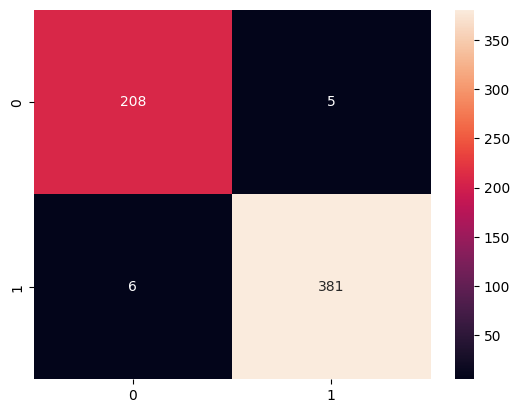

Feature Ranking: 
1. feature TAVG_Avg (0.517672)
2. feature soilmoisture_Avg_8ft (0.142034)
3. feature PREC_Avg (0.132770)
4. feature soilmoisture_Avg_2ft (0.100428)
5. feature soilmoisture_Avg_4ft (0.058906)
6. feature soilmoisture_Avg_20ft (0.048191)


In [112]:
dt_model=DecisionTreeClassifier(
    criterion='entropy', # "entropy" or "gini"
    splitter='random',  # "random" or "best"
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None
)

dt_model.fit(X_train, y_train)
print('Model Accuracy: ', dt_model.score(X_test, y_test))

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# feature importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
print('Feature Ranking: ')
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

### With Gini

Model Accuracy:  0.98
Confusion Matrix: 


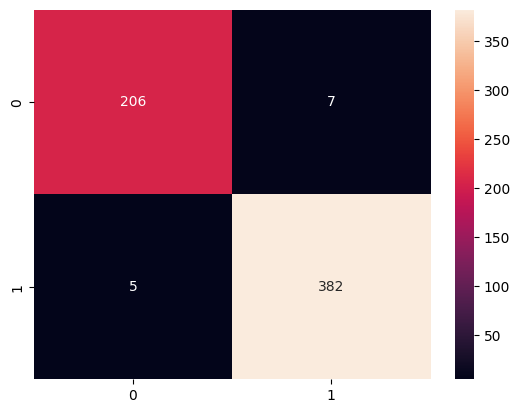

Feature Ranking: 
1. feature TAVG_Avg (0.528886)
2. feature soilmoisture_Avg_8ft (0.236451)
3. feature PREC_Avg (0.142086)
4. feature soilmoisture_Avg_20ft (0.035637)
5. feature soilmoisture_Avg_4ft (0.032870)
6. feature soilmoisture_Avg_2ft (0.024070)


In [93]:
dt_model=DecisionTreeClassifier(
    criterion='gini', # "entropy" or "gini"
    splitter='random',  # "random" or "best"
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None
)

dt_model.fit(X_train, y_train)
print('Model Accuracy: ', dt_model.score(X_test, y_test))

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# feature importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
print('Feature Ranking: ')
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

### Tweak Parameters

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.9812221642310369
Model Accuracy:  0.98
Confusion Matrix: 


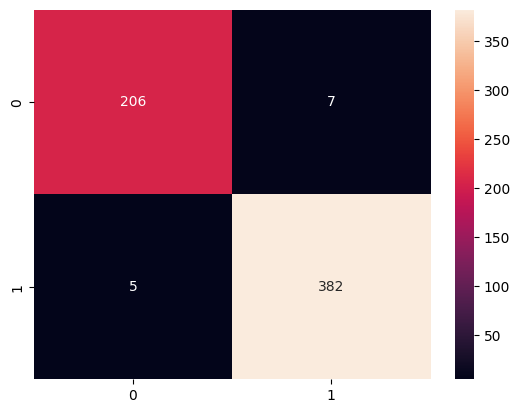

Feature Ranking: 
1. feature TAVG_Avg (0.492523)
2. feature soilmoisture_Avg_8ft (0.251162)
3. feature PREC_Avg (0.156680)
4. feature soilmoisture_Avg_4ft (0.043186)
5. feature soilmoisture_Avg_20ft (0.035481)
6. feature soilmoisture_Avg_2ft (0.020968)


In [117]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best Parameters:', best_params)
print('Best Cross-Validation Score:', best_score)

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Evaluate the model
print('Model Accuracy: ', best_dt_model.score(X_test, y_test))

# Confusion matrix
y_pred = best_dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Feature importance
importances = best_dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
print('Feature Ranking: ')
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

### Best Parameters: 
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}